<p style="text-align:center;font-size:30px;"><b>Tutorial de TensorFlow</b></p>
<p style="text-align:center;">Pedro Cheira | 53436 | MAEBD</p>

<p style="text-align:justify;">Este documento serve de tutorial da framework TensorFlow e visa introduzir, brevemente, algumas capacidades da mesma. Foi elaborado no âmbito da unidade curricular de Aprendizagem com Dados Não Estruturados, do Mestrado em Análise e Engenharia de Big Data, da Faculdade de Ciências e Tecnologia da Universidade Nova de Lisboa.</p>
<p style="text-align:justify;">Descrevem-se abordagens a dois problemas de classificação:</p>
<ul style="text-align:justify;">
<li>O primeiro consiste em reconhecer dígitos manuscritos representados numa determinada imagem. Para tal, é utilizado o popular dataset MNIST (Modified National Institute of Standards and Technology database).</li> 
<li>O segundo resume-se a descobrir a qual de 10 grupos pertence uma determinada imagem, utilizando-se o dataset CIFAR-10 (Canadian Institute for Advanced Research).</li>
</ul>

<h2>TensorFlow</h2>

<p style="text-align:justify;">O TensorFlow é uma biblioteca de software de código aberto para computação numérica que usa gráficos de fluxo de dados. Os nodes no gráfico representam operações matemáticas, e as arestas representam as matrizes ou tensores de dados multidimensionais que se comunicam com os nodes. A arquitetura flexível permite a implementação de aplicações de computação num ou mais CPUs ou GPUs num computador, servidor ou dispositivo móvel usando uma única API. O TensorFlow foi desenvolvido por investigadores e engenheiros da Google Brain Team no departamento de investigação de machine learning da Google, com a finalidade de realizar investigação sobre redes neurais profundas (deep learning) e aprendizagem automática. No entanto, devido à característica abrangente do sistema, também pode ser aplicado a vários outros domínios.</p>

<h2>MNIST - Softmax Regression</h2>

<p style="text-align:justify;">O dataset MNIST (Modified National Institute of Standards and Technology database) contém imagens de dígitos manuscritos divididas em 3 conjuntos: treino (55000 imagens), teste (10000 imagens) e validação (5000 imagens). Cada imagem tem 28 por 28 pixels, que deram origem a um array (numpy) de 784 features. Há 10 labels de classes (algarismos de 0 a 9) já na forma one-hot encoding.</p>

<img src="https://media.data.world/1ECoxJH9QVCIn3km6L5e_Screen%20Shot%202017-06-27%20at%204.58.43%20PM.png" alt="MNIST" width="250" height="300">
<p style="text-align:center;">Exemplos de imagens do dataset MNIST</p>

<p style="text-align:justify;">Como se pretende lidar com classificação de múltiplas classes, utiliza-se <b>Softmax Regression</b>.
Softmax Regression (ou multinomial logistic regression) é uma generalização da logistic regression para lidar com várias classes. Para tal, transforma o vetor $z$, de dimensão K, de valores reais arbitrários, no vetor $\sigma(z)$, da mesma dimensão, de valores reais, onde cada entrada pertence ao intervalo entre 0 e 1, e a soma de todas as entradas dá 1. Assim, torna-se possível expressar a probabilidade de um exemplo pertencer a determinada classe. A função é dada por:</p>

$$\sigma:\mathbb{R}^K \to \left\{\sigma \in \mathbb{R}^K| \sigma_i > 0, \sum_{i = 1}^K \sigma_i  = 1 \right\}$$
$$\sigma(\mathbf{z})_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$
<p style="text-align:center;">para j = 1, ... , K.</p>

<p>No caso da classificação de dígitos as labels possíveis são os algarismos de 0 a 9.</p>

<p style="font-size:18px;"><b>Importar dependências</b></p>

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<p style="font-size:18px;"><b>Download dos dados</b></p>
<p style="text-align:justify;">O TensorFlow permite efetuar o download e leitura dos dados do MNIST de forma automática, bastando apenas usar o código abaixo. Os dados serão descarregados e gravados na pasta "MNIST_data" (criada automáticamente), no local onde o código está a ser executado e, posteriormente, carregados para o programa. É importante realçar o facto de os dados poderem ser carregados já em one-hot encoding (através do parâmetro "one_hot").</p>
<p style="text-align:justify;">O Output consiste em mensagens de sucesso.</p>

In [22]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<p style="font-size:18px;"><b>Preparar as directorias para o TensorBoard</b></p>

In [23]:
from datetime import datetime
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "logs"
logdir = "{}/model-{}/".format(root_logdir, now)

tf.logging.set_verbosity(tf.logging.INFO)

<p style="font-size:18px;"><b>Dataset</b></p>
<p style="text-align:justify;">O dataset tem “m” features e “n” observações. Existem “k” labels representativas de cada uma das 10 classes. Assim, considerando um dataset de 100 imagens de dígitos manuscritos de tamanho 28x28 pixels, tem-se: n = 100, m = 28x28 = 784 e k = 10.</p>
<p style="text-align:justify;">No código abaixo é possível analisar alguns aspetos do dataset, tais como as dimensões da matriz de features e da matriz target, que contém as labels de cada observação. É também possível constatar que a primeira observação corresponde ao algarismo "7", tanto através do plot como através do primeiro vetor one-hot encoded, em que a oitava posição (correspondente a "7") é a única a 1.</p>

Shape of feature matrix: (55000, 784)
Shape of target matrix: (55000, 10)
One-hot encoding for 1st observation:
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


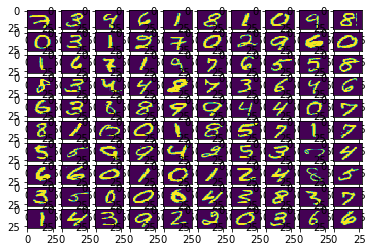

In [24]:
print("Shape of feature matrix:", mnist.train.images.shape)
print("Shape of target matrix:", mnist.train.labels.shape)
print("One-hot encoding for 1st observation:\n", mnist.train.labels[0])
 
# visualize data by plotting images
fig,ax = plt.subplots(10,10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(mnist.train.images[k].reshape(28,28), aspect='auto')
        k += 1
plt.show()

<p style="font-size:18px;"><b>Variáveis</b></p>
<p style="text-align:justify;">Aqui guardam-se os já conhecidos números de features e de labels em variáveis. Também se define a taxa de aprendizegem, $\alpha$, como 0.05. Define-se o número de épocas e o tamanho dos batches (subsets do conjunto de treino). É utilizado Minibatch Stochastic Gradient Descent.</p>

In [25]:
# number of features
num_features = 784
# number of target labels
num_labels = 10
# learning rate (alpha)
learning_rate = 0.05
# batch size
batch_size = 128
# number of epochs
num_steps = 5001
 
# input data
train_dataset = mnist.train.images
train_labels = mnist.train.labels
test_dataset = mnist.test.images
test_labels = mnist.test.labels
valid_dataset = mnist.validation.images
valid_labels = mnist.validation.labels

<p style="font-size:18px;"><b>Grafo de computação</b></p>
<p style="text-align:justify;">O TensorFlow usa um grafo dataflow para representar a computação pretendida, em termos de dependências entre operações indivíduais. Isto leva a que se considere este modelo como um modelo de programação de baixo nível no qual se define, primeiro, o grafo dataflow e depois se cria uma sessão TensorFlow, para executar partes do grafo ao longo de um conjunto de máquinas locais e remotas.</p>
<p style="text-align:justify;">Um grafo TensorFlow contém dois tipos de informação relevante:</p>
<ul>
    <li><b>Estrutura do grafo</b> - Os vértices e arestas do grafo, que indicam como as operações individuais são compostas em conjunto, mas não como devem ser usadas.</li>
    <li><b>Coleções do grafo</b> - O TensorFlow fornece um mecanismo geral para guardar coleções de metadados num <code>tf.Graph</code>. A função <code>tf.add_to_collection</code> permite associar uma lista de objetos a uma chave (<code>tf.GraphKeys</code> define algumas das chaves standard), e a função <code>tf.get_collection</code> permite ver todos os objetos associados a uma chave.</li>
</ul>

<p style="text-align:justify;">No código abaixo podemos ver que o grafo é guardado na variável graph, através da operação <code>tf.Graph()</code>. De seguida, ao invocar a função <code>as_default()</code> é devolvido um context manager que torna este grafo no grafo default.</p>
    

In [27]:
# initialize a tensorflow graph
graph = tf.Graph()
 
with graph.as_default():
    """
    defining all the nodes
    """
 
    # Inputs
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, num_features), name="Train_Dataset")
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels), name="Train_Labels")
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)
 
    # Variables.
    weights = tf.Variable(tf.truncated_normal([num_features, num_labels]), name="Weights")
    biases = tf.Variable(tf.zeros([num_labels]), name="Bias")
 
    # Training computation.
    logits = tf.matmul(tf_train_dataset, weights) + biases
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
                        labels=tf_train_labels, logits=logits))
 
    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
 
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(tf.matmul(tf_valid_dataset, weights) + biases)
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

<p style="text-align:justify;">Alguns pontos importantes a reter:</p>

<ul>
    <li>Para os dados de treino, utiliza-se <code>tf.placeholder</code>. Um placeholder é apenas uma variável à qual vamos associar informação mais tarde. Permitem criar operações e construir o grafo de computação, sem precisar dos dados no momento de criação. Na terminologia do TensorFlow diz-se que o placeholder vai ser "alimentado" em tempo de execução.</li>
    <li>Para a matriz de pesos e os valores de bias utiliza-se a classe <code>tf.Variable</code>. Estas variáveis do TensorFlow constituem a melhor forma de representar o estado partilhado e persistente, manipulado pelo nosso programa. Internamente, guardam um tensor persistente. Operações específicas permitem ler e modificar os valores deste tensor. Estas modificações são visíveis ao longo de multiplas <code>tf.Sessions</code>, por isso multiplos workers podem ver os mesmos valores para uma <code>tf.Variable</code>. Também poderia ter sido utilizado <code>tf.get_variable</code>.</li>
    <li>A matriz de pesos é inicializada usando valores aleatórios que seguem uma distribuição normal (truncada). É utilizado o método <code>tf.truncated_normal</code>. Os valores de bias são inicializados a zero com o método <code>tf.zeros</code>.</li>
    <li>São efetuadas as típicas operações de multiplicação dos inputs pela matriz de pesos seguida da adição dos valores de bias ao resultado da multiplicação. Para a multiplicação (de matrizes) é utilizado <code>tf.matmul</code>, uma das operações de cálculo matricial já definidas no TensorFlow. O resultado é guardado numa variável denominada por <code>logits</code> e corresponde ao vetor das previsões (não normalizadas) que o modelo de classificação gerou e que, geralmente, é depois passado para uma função de normalização. Neste caso, como o modelo resolve um problema de classificação multi-classe, <code>logits</code> será o input da função softmax. A função softmax gera um vetor de probabilidades (normalizadas) com um valor para cada classe possível.</li>
    <li>De seguida, calcula-se a função softmax e a função de custo (neste caso, a cross-entropy). Por serem funções muito utilizadas, o TensorFlow possui uma operação que engloba ambas: <code>tf.nn.softmax_cross_entropy_with_logits</code>. Além disso, esta operação pode ser otimizada. Encontra-se a média da cross-entropy, considerando todos os exemplos de treino, utilizando a função <code>tf.reduce_mean</code>.</li>
    <li>Minimiza-se o custo usando o gradient descent. Para tal, utiliza-se o optimizer <code>tf.train.GradientDescentOptimizer</code>, incluído na coleção de optimizers do TensorFlow, em <code>tf.train</code>. Utiliza-se o método <code>minimize</code> do optimizer.</li>
    <li><code>train_prediction</code>, <code>valid_prediction</code> e <code>test_prediction</code> não fazem parte do treino, mas são necessárias para ir reportando valores de precisão, durante o treino.</li>
</ul>

<p style="font-size:18px;"><b>Execução do grafo de computação</b></p>
<p style="text-align:justify;">Após termos construído o grafo de computação, é tempo de executá-lo através de uma sessão. O TensorFlow usa a classe <code>tf.Session</code> para representar a ligação entre o programa cliente - tipicamente, um programa Python - e o runtime C++. Um objeto <code>tf.Session</code> fornece acesso a equipamentos na máquina local e a equipamentos remotos, utilizando o runtime distribuído do TensorFlow. Também guarda informação sobre o <code>tf.Graph</code>, para executar eficientemente a mesma computação, multiplas vezes.</p>
<p style="text-align:justify;">Uma sessão é tipicamente utilizada como um context manager (dentro de um bloco "with") que termina automaticamente a sessão, quando se sai do bloco.</p>
<p style="text-align:justify;">O método <code>tf.Session.run</code> é o principal mecanismo para executar uma <code>tf.Operation</code> ou avaliar um <code>tf.Tensor</code>. É possível passar um ou mais objetos <code>tf.Operation</code> ou <code>tf.Tensor</code> para <code>tf.Session.run</code> e, assim, o TensorFlow executa as operações necessárias para calcular o resultado. <code>tf.Session.run</code> requer que se especifique uma lista de "fetches", que determina os valores a retornar e podem ser <code>tf.Operation</code>, <code>tf.Tensor</code> ou um tipo tensor-like tal como <code>tf.Variable</code>. Esses "fetches" determinam qual o sub-grafo do <code>tf.Graph</code> a executar para produzir o resultado.</p>

In [28]:
# utility function to calculate accuracy
def accuracy(predictions, labels):
    correctly_predicted = np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
    accu = (100.0 * correctly_predicted) / predictions.shape[0]
    return accu
 
with tf.Session(graph=graph) as session:
    # initialize weights and biases
    tf.global_variables_initializer().run()
    print("Initialized")
    
    # initialize file writer to log data and visualize it with TensorBoard
    file_writer = tf.summary.FileWriter(logdir, session.graph)
 
    for step in range(num_steps):
        # pick a randomized offset
        offset = np.random.randint(0, train_labels.shape[0] - batch_size - 1)
 
        # Generate a minibatch.
        batch_data = train_dataset[offset:(offset + batch_size), :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
 
        # Prepare the feed dict
        feed_dict = {tf_train_dataset : batch_data,
                     tf_train_labels : batch_labels}
 
        # run one step of computation
        _, l, predictions = session.run([optimizer, loss, train_prediction],
                                        feed_dict=feed_dict)
 
        if (step % 500 == 0):
            print("Minibatch loss at step {0}: {1}".format(step, l))
            value_train_loss = tf.Summary.Value(tag='Train_loss',simple_value=l)
            summary = tf.Summary(value=[value_train_loss])
            file_writer.add_summary(summary, step)
            
            train_accuracy = accuracy(predictions, batch_labels)
            print("Minibatch accuracy: {:.1f}%".format(train_accuracy))
            
            validation_accuracy = accuracy(valid_prediction.eval(), valid_labels)
            print("Validation accuracy: {:.1f}%".format(validation_accuracy))
            
            # log data
            value_train = tf.Summary.Value(tag='Train_accuracy',simple_value=train_accuracy)
            value_validation = tf.Summary.Value(tag='Validation_accuracy',simple_value=validation_accuracy)

            summary = tf.Summary(value=[value_train,value_validation])
            file_writer.add_summary(summary, step)
 
    print("\nTest accuracy: {:.1f}%".format(
        accuracy(test_prediction.eval(), test_labels)))
    file_writer.close()

Initialized
Minibatch loss at step 0: 12.63520336151123
Minibatch accuracy: 7.0%
Validation accuracy: 9.0%
Minibatch loss at step 500: 1.2474206686019897
Minibatch accuracy: 68.0%
Validation accuracy: 66.1%
Minibatch loss at step 1000: 1.0424119234085083
Minibatch accuracy: 81.2%
Validation accuracy: 75.9%
Minibatch loss at step 1500: 1.3145450353622437
Minibatch accuracy: 76.6%
Validation accuracy: 79.4%
Minibatch loss at step 2000: 0.5827685594558716
Minibatch accuracy: 83.6%
Validation accuracy: 81.5%
Minibatch loss at step 2500: 0.5758383274078369
Minibatch accuracy: 82.8%
Validation accuracy: 83.3%
Minibatch loss at step 3000: 0.6070429682731628
Minibatch accuracy: 86.7%
Validation accuracy: 84.0%
Minibatch loss at step 3500: 0.8440330624580383
Minibatch accuracy: 80.5%
Validation accuracy: 84.9%
Minibatch loss at step 4000: 0.8456128835678101
Minibatch accuracy: 79.7%
Validation accuracy: 85.6%
Minibatch loss at step 4500: 0.6035041809082031
Minibatch accuracy: 85.2%
Validation a

<p style="text-align:justify;">Alguns pontos importantes a reter:</p>

<ul>
    <li style="text-align:justify;">Apenas após executar <code>tf.global_variables_initializer()</code>, numa sessão, é que as variáveis irão conter os valores com os quais foram declaradas (por exemplo: <code>tf.Variable(tf.zeros(...))</code>, <code>tf.Variable(tf.random_normal(...))</code>,...).</li>
    <li style="text-align:justify;">Em cada iteração, um minibatch é selecionado, ao escolher um valor de offset aleatório, usando a instrução <code>np.random.randint</code>.</li>
    <li style="text-align:justify;">Observa-se que <code>tf.Session.run</code> também pode receber um dicionário de "feeds", correspondente a mapeamentos de objetos <code>tf.Tensor</code> (tipicamente tensores <code>tf.placeholder</code>) para valores (tipicamente escalares e listas do Python ou arrays do NumPy) que irão ser substituídos para esses tensores na execução. Neste caso, para "alimentar" os placeholders <code>tf_train_dataset</code> e <code>tf_train_label</code>, criou-se o dicionário <code>feed_dict</code>.</li>
    <li style="text-align:justify;">A instrução <code>session.run()</code> devolve os novos valores de custo e previsões após completar o passo de optimização.</li>
    <li style="text-align:justify;">Os resultados de custo e precisão de treino e validação vão sendo mostrados a cada 500 passos (dos 5001). No final do treino, testa-se o modelo, com o conjunto de teste.</li>
    <li style="text-align:justify;">Os resultados de precisão são obtidos através da função <code>t.eval()</code>. Esta função é equivalente a <code>tf.get_default_session().run(t)</code>, sendo que, neste caso, a default session corresponde à variável <code>session</code>. Utilizar <code>eval()</code> apenas permite o "fetch" do valor de um tensor em cada passo.</li>
    <li style="text-align:justify;">É recomendável que se experimente variar os valores dos parâmetros, como o learning rate, tamanho do batch, número de épocas, entre outros, para alcançar melhores resultados. Utilizar outro optimizer também seria o ideal, como por exemplo o <code>tf.train.AdamOptimizer</code>.</li>
    <li style="text-align:justify;">A precisão do modelo poderia ser melhorada utilizando uma rede neuronal com uma ou mais camadas ocultas.</li>
</ul>

<p style="font-size:18px;"><b>TensorBoard</b></p>

![alt text](mnist_tensorboard_graph.png "Grafo de computação")
<p style="text-align:center;">Grafo de computação</p>
![alt text](mnist_tensorboard_scalars_train.png "Precisão e Custo - Treino")
<p style="text-align:center;">Gráficos de precisão e custo - Treino</p>
![alt text](mnist_tensorboard_scalars_val.png "Precisão - Validação")
<p style="text-align:center;">Gráfico de precisão - Validação</p>

<h2>CIFAR-10 - Redes neuronais de convolução</h2>

<p style="text-align:justify;">O dataset CIFAR-10 (Canadian Institute For Advanced Research) é uma coleção de imagens geralmente usadas para treinar algoritmos de machine learning ou visão computacional. É um dos datasets mais utilizados para investigação em machine learning. Contém 60000 imagens a cor de 32x32 pixels, agrupadas em 10 classes distintas: aviões, carros, aves, gatos, veados, cães, sapos, cavalos, barcos e camiões. Existem 6000 imagens em cada classe.</p>


<p style="text-align:justify;">Normalmente, algoritmos computacionais para reconhecer objetos em fotografias aprendem por exemplo. CIFAR-10 é um conjunto de imagens que pode ser utilizado para ensinar um computador a reconhecer objetos. Já que as imagens deste dataset são de baixa resolução (32x32), permite aos investigadores experimentar diversos algoritmos, de forma rápida, para observar qual funciona. Vários tipos de redes neuronais de convolução tendem a ser a melhor solução para reconhecer imagens no CIFAR-10.</p>

<img src="https://cdn-images-1.medium.com/max/944/1*6XQqOifwnmplS22zCRRVaw.png" alt="CIFAR-10" width="500" height="600">
<p style="text-align:center;">Exemplos de imagens do dataset CIFAR-10</p>


<p style="font-size:18px;"><b>Custom Estimators e Layers</b></p>
<p style="text-align:justify;">O principal objetivo deste tutorial consiste em resolver o problema de classificação do CIFAR-10, com redes neuronais de convolução, utilizando a API de Custom Estimators e a classe Layers do TensorFlow.</p>
<p style="text-align:justify;">Será criado um Estimator (classe do TensorFlow para treino, avaliação e inferência de modelos de alto-nível) para o modelo. É possível utilizar os pre-made Estimators que o TensorFlow já fornece ou então criar o nosso próprio custom Estimator (será este o caso).</p>
<p style="text-align:justify;">O módulo de layers do TensorFlow oferece uma API de alto-nível que torna fácil construir uma rede neuronal. Fornece métodos que facilitam a criação de camadas densas (fully connected) e camadas de convolução, adicionando funções de ativação e aplicando regularização através de dropout.</p>

<p style="font-size:18px;"><b>Redes Neuronais de Convolução</b></p>

<p style="text-align:justify;">Atualmente, Redes Neuronais de Convolução (CNNs) constituem a arquitetura de modelo state-of-the-art para classificação de imagem. As CNNs aplicam vários filtros à informação dos pixeis (raw) de uma imagem para extrair e aprender features de um nível mais alto, que o modelo pode depois utilizar para classificação:</p>

<ul>

<li style="text-align:justify;"><b>Camadas de Convolução</b>, que aplicam um número específico de filtros de convolução à imagem. Para cada sub-região, a camada executa um conjunto de operações matemáticas para produzir um único valor no mapa de features de output. Depois, tipicamente, estas camadas aplicam a função de ativação ReLU ao output para introduzir não-linearidade no modelo.</li>

<li style="text-align:justify;"><b>Camadas de Pooling</b>, que reduzem a resolução da informação da imagem extraída pelas camadas de convolução, para reduzir a dimensionalidade do mapa de features e assim diminuir o tempo de processamento. Um algoritmo frequentemente utilizado é o max pooling, que extrai sub-regiões do mapa de features (p.ex: blocos de 2x2 pixels), mantém o seu valor máximo e descarta todos os outros valores.</li>

<li style="text-align:justify;"><b>Camadas Densas (fully connected)</b>, que executam classificação nas features extraídas pelas camadas de convolução e "downsampled" pelas camadas de pooling. Numa camada densa, todos os nós da camada estão ligados a todos os nós da camada seguinte.</li>

</ul>

<p style="text-align:justify;">Normalmente, uma CNN é composta por uma pilha de módulos de convolução que executam a extração de features. Cada módulo consiste numa camada de convolução seguida de uma camada de pooling. O último módulo é seguido de uma ou mais camadas densas que efetuam a classificação. A camada densa final numa CNN contém um só nó para cada classe alvo no modelo (todas as possíveis classes que o modelo pode prever), com uma função de ativação softmax para gerar um valor entre 0 e 1 para cada nó (a soma de todos estes valores softmax é igual a 1). Pode-se interpretar os valores softmax para uma determinada imagem como medidas relativas acerca de quão provável é essa imagem pertencer a uma classe alvo.</p>

<p style="font-size:18px;"><b>Arquitetura da Rede</b></p>

<p style="text-align:justify;">Será criado um modelo para classificar as imagens do dataset CIFAR-10 com a seguinte arquitetura CNN:</p>

<ol>

<li style="text-align:justify;"><b>Camada de Convolução 1</b>: Aplica 64 filtros 5x5 (extraí 5x5 sub-regiões de pixels), com função de ativação ReLU.</li>

<li style="text-align:justify;"><b>Camada de Pooling 1</b>: Executa max pooling com filtro 2x2 e stride de 2 (regiões pooled não se sobrepõem).</li>

<li style="text-align:justify;"><b>Local Response Normalization 1</b></li>

<li style="text-align:justify;"><b>Camada de Convolução 2</b>: Aplica 64 filtros 5x5, com função de ativação ReLU.</li>

<li style="text-align:justify;"><b>Local Response Normalization 2</b></li>

<li style="text-align:justify;"><b>Camada de Pooling 2</b>: Executa max pooling com filtro 2x2 e stride de 2.</li>

<li style="text-align:justify;"><b>Camada Densa (fully connected) 1</b>: 1024 neurónios, com taxa de regularização dropout de 0.4 (qualquer elemento possui probabilidade de 0.4 de ser ignorado, durante o treino).</li>

<li style="text-align:justify;"><b>Camada Densa (fully connected) 2</b>: 512 neurónios, com taxa de regularização dropout de 0.4 (qualquer elemento possui probabilidade de 0.4 de ser ignorado, durante o treino).</li>

<li style="text-align:justify;"><b>Camada Densa 3 (Camada de Logits)</b>: 10 neurónios, um para cada classe alvo de imagens.</li>

</ol>

<p style="text-align:justify;">O módulo <code>tf.layers</code> contém métodos para criar cada um dos três tipos de camadas descritas anteriormente:</p>

<ul>

<li style="text-align:justify;"><code>conv2d()</code>: Constrói uma camada de convolução de duas dimensões. Recebe como argumentos o número de filtros, tamanho do kernel do filtro, padding e função de ativação.</li>

<li style="text-align:justify;"><code>max_pooling2d()</code>: Constrói uma camada de pooling de duas dimensões, utilizando o algoritmo max-pooling. Recebe como argumentos o tamanho do filtro de pooling e stride.</li>

<li style="text-align:justify;"><code>dense()</code>: Constrói uma camada densa. Recebe o número de neurónios e a função de ativação como argumentos.</li>

</ul>

<p style="text-align:justify;">Cada um destes métodos aceita um tensor como input e retorna um tensor transformado como output. Isto torna fácil ligar uma camada a outra: basta receber o output de uma camada e fornecê-lo como input a outra.</p>

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import cifar10_data

tf.logging.set_verbosity(tf.logging.INFO)

def cnn_model_fn(features, labels, mode):
    """Model function for CNN."""
    # Input Layer
    input_layer = tf.reshape(features["x"], [-1, 32, 32, 3])

    # Convolutional Layer #1
    conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

    # Pooling Layer #1
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
  
    # Norm 1
    norm1 = tf.nn.lrn(pool1, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75,
                    name='norm1')

    # Convolutional Layer #2
    conv2 = tf.layers.conv2d(
      inputs=norm1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)
  
    # Norm 2
    norm2 = tf.nn.lrn(pool1, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75,
                    name='norm2')
  
    # Pooling Layer #2  
    pool2 = tf.layers.max_pooling2d(inputs=norm2, pool_size=[2, 2], strides=2)

    # Dense Layer 1
    pool2_flat = tf.reshape(pool2, [-1, 8 * 8 * 64])
    dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
  
    # Dense Layer 2
    dense2 = tf.layers.dense(inputs=dropout, units=512, activation=tf.nn.relu)
    dropout2 = tf.layers.dropout(
      inputs=dense2, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

    # Logits Layer
    logits = tf.layers.dense(inputs=dropout2, units=10)

    predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    
    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        # Write to TensorBoard
        tf.summary.scalar("loss_train", loss)
        
        optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    accuracy = tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])

    eval_metric_ops = {
      "accuracy": accuracy}
    return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

<p style="font-size:18px;"><b>Download dos dados e criação e execução do Estimator</b></p>

<p style="text-align:justify;">No código abaixo começa-se por se efetuar o download dos conjuntos de treino e teste do CIFAR-10. O script Python cifar10_data que trata do download é importado. O código não será mostrado no tutorial, contudo, o ficheiro está na pasta enviada.</p>

<p style="text-align:justify;">De seguida, cria-se o Estimator através de <code>tf.estimator.Estimator</code>. O parâmetro model_fn corresponde à função do modelo para usar para treino, avaliação e previsão; portanto, é passada a função <code>cnn_model_fn</code>. O argumento model_dir especifica a directoria onde a informação sobre o modelo (checkpoints) será gravada (neste caso, será em "/tmp/cifar10_convnet_model").</p>

<p style="text-align:justify;">Como as CNNs podem demorar muito tempo a treinar, é benéfico configurar algum tipo de logging para se ir acompanhando o progresso durante o treino. É possível utilizar <code>tf.train.SessionRunHook</code>, do TensorFlow, para criar um <code>tf.train.LoggingTensorHook</code> que vai efetuando o log dos valores de probabilidade da camada softmax da CNN. Para tal, guarda-se um dicionário dos tensors dos quais se pretende fazer log, em tensors_to_log. Cada chave é uma label à escolha que será impressa no output do log e o valor correspondente é o nome de um tensor no grafo do TensorFlow. Aqui, as probabilidades podem ser encontrados em softmax_tensor, o nome que foi dado à operação de softmax, anteriormente, quando se geraram as probabilidades em cnn_model_fn. De seguida, cria-se o LoggingTensorHook, passando tensors_to_log para o argumento "tensors". Define-se every_n_iter = 100, que especifica que o log das probabilidades deve ser feito a cada 100 passos de treino.</p>

<p style="text-align:justify;">Agora é o momento de treinar o modelo, o que pode ser feito ao criar train_input_fn e chamar a função <code>train()</code> no cifar10_classifier. Na chamada <code>tf.estimator.inputs.numpy_input_fn</code>, passam-se os dados de treino para o argumento x (dicionário) e as labels de treino para y. Define-se um batch size de 100 (o que significa que o modelo vai efetuar o treino com minibatches de 100 exemplos, em cada passo). Define-se num_epochs=None, o que significa que o modelo vai treinar até se alcançar o número especificado de passos. Define-se shuffle=True para baralhar os dados de treino. O número de passos é definido como steps=1000 (o que significa que o modelo vai treinar durante 1000 passos). É também passado o logging_hook para o argumento hooks, para se ir fazendo logging durante o treino.</p>

<p style="text-align:justify;">Assim que o treino estiver completo, pretende-se avaliar o modelo para determinar a sua precisão no conjunto de teste do CIFAR-10. Invoca-se o método <code>evaluate()</code> que avalia as métricas especificadas no argumento eval_metric_ops no model_fn. Para criar eval_input_fn, define-se num_epochs=1, para que o modelo avalie as métricas tendo em conta uma época de dados. Define-se shuffle=False para se iterar sobre os dados de forma sequencial.</p>

In [2]:
def run_cifar10():
    
    # Load training and eval data
    t_data, train_labels, tr_labels = cifar10_data.load_training_data()    
    e_data, eval_labels, ev_labels = cifar10_data.load_test_data()  
  
    # Convert to float32
    train_data = np.float32(t_data)
    eval_data = np.float32(e_data)
  
    # Create the Estimator
    cifar10_classifier = tf.estimator.Estimator(
      model_fn=cnn_model_fn, model_dir="/tmp/cifar10_convnet_model")

    # Set up logging for predictions
    # Log the values in the "Softmax" tensor with label "probabilities"
    tensors_to_log = {"probabilities": "softmax_tensor"}
    logging_hook = tf.train.LoggingTensorHook(
      tensors=tensors_to_log, every_n_iter=100)

    # Train the model
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": train_data},
      y=train_labels,
      batch_size=100,
      num_epochs=None,
      shuffle=True)
    train_results = cifar10_classifier.train(
      input_fn=train_input_fn,
      steps=1000,
      hooks=[logging_hook])

    # Evaluate the model and print results
    eval_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": eval_data},
      y=eval_labels,
      num_epochs=1,
      shuffle=False)
    eval_results = cifar10_classifier.evaluate(input_fn=eval_input_fn)
    print(eval_results)
    
run_cifar10()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/cifar10_convnet_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025AA3BEDCC0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_rep

INFO:tensorflow:loss = 2.3104017, step = 1
INFO:tensorflow:global_step/sec: 2.99378
INFO:tensorflow:probabilities = [[0.12179022 0.05696849 0.08405156 0.12417798 0.05823662 0.15515766
  0.05502829 0.04896527 0.17542183 0.12020219]
 [0.06402117 0.01672421 0.18160942 0.25051853 0.1615546  0.20946614
  0.03997101 0.05270808 0.01568012 0.00774684]
 [0.05289187 0.00312123 0.15141039 0.04246603 0.5355987  0.03190714
  0.11187497 0.06220208 0.00414019 0.00438746]
 [0.00438485 0.00258498 0.12220469 0.08589025 0.37195262 0.04863474
  0.31555507 0.04667694 0.00109281 0.00102305]
 [0.03954758 0.02099438 0.10646966 0.14763373 0.13816002 0.07978015
  0.3625199  0.07952599 0.0064044  0.0189642 ]
 [0.29718173 0.07767607 0.06180236 0.03620509 0.0479196  0.01977314
  0.01608026 0.07308667 0.23122618 0.13904889]
 [0.05090672 0.02347205 0.12189018 0.08648676 0.21276231 0.1254963
  0.21199195 0.14647058 0.0101086  0.01041448]
 [0.13344991 0.4225094  0.00811756 0.02987848 0.0024957  0.00696988
  0.0246794 

INFO:tensorflow:loss = 1.8025825, step = 101 (33.405 sec)
INFO:tensorflow:global_step/sec: 2.96705
INFO:tensorflow:probabilities = [[0.6232017  0.00283466 0.18188946 0.05604915 0.03623825 0.0626795
  0.00224066 0.01406804 0.01479223 0.00600632]
 [0.02471839 0.02277649 0.03016636 0.0072662  0.02330721 0.01498212
  0.02102048 0.6901216  0.00024889 0.16539234]
 [0.24934809 0.09408917 0.09348771 0.01538542 0.04188256 0.0152744
  0.01063575 0.00882575 0.4247617  0.04630939]
 [0.00666633 0.09923291 0.00569863 0.01582403 0.00213834 0.00306586
  0.01858668 0.00060651 0.02619393 0.82198673]
 [0.04700891 0.03320882 0.21775961 0.08864462 0.16663404 0.11991491
  0.1821579  0.04991441 0.05512164 0.03963514]
 [0.0395961  0.02009777 0.1385262  0.2852514  0.06294202 0.1208389
  0.20381998 0.018509   0.06465489 0.04576372]
 [0.00530745 0.0004264  0.05431103 0.04790601 0.03806955 0.66093177
  0.00332129 0.1871811  0.00077134 0.00177406]
 [0.00287513 0.29864442 0.00038556 0.0024257  0.00026086 0.00039653

INFO:tensorflow:loss = 1.3719695, step = 201 (33.704 sec)
INFO:tensorflow:global_step/sec: 2.95722
INFO:tensorflow:probabilities = [[0.21751027 0.01519134 0.08211792 0.01558491 0.24340641 0.01180811
  0.0049099  0.37422636 0.01214083 0.02310386]
 [0.09263454 0.03521423 0.11139542 0.09935266 0.14096308 0.06947144
  0.28974885 0.08090463 0.0580316  0.02228361]
 [0.00070504 0.0004314  0.03173288 0.5097067  0.02728754 0.26763877
  0.14567065 0.01406777 0.00060888 0.00215037]
 [0.00761732 0.0020699  0.29691523 0.18234484 0.1576421  0.15808558
  0.02980223 0.158598   0.0039009  0.00302385]
 [0.3905378  0.00734631 0.0587751  0.01690208 0.02160673 0.00626615
  0.01724848 0.00202989 0.45672312 0.02256426]
 [0.00246961 0.00455544 0.05559535 0.1162445  0.03940745 0.04230581
  0.7281747  0.00552451 0.00138293 0.00433977]
 [0.00272949 0.00069034 0.09428578 0.20217519 0.04163748 0.1441067
  0.508855   0.0040957  0.00063526 0.00078905]
 [0.3124542  0.00937186 0.13827772 0.14443696 0.15882793 0.065496

INFO:tensorflow:loss = 1.4246713, step = 301 (33.820 sec)
INFO:tensorflow:global_step/sec: 2.9553
INFO:tensorflow:probabilities = [[0.00817342 0.00126529 0.16684878 0.11675697 0.4645081  0.10411653
  0.11579512 0.01610912 0.0052339  0.0011928 ]
 [0.10759515 0.0971316  0.12076904 0.21417873 0.04183505 0.17209855
  0.04976878 0.06451186 0.02342736 0.10868387]
 [0.02367801 0.00483758 0.1283986  0.1951317  0.1667362  0.24605343
  0.16240253 0.0462321  0.01083698 0.01569273]
 [0.00269109 0.95847744 0.00053163 0.00331646 0.00043055 0.00047337
  0.00041143 0.00037555 0.00341809 0.02987443]
 [0.05424179 0.0058932  0.00636509 0.0046935  0.00131345 0.0008568
  0.00044303 0.00029223 0.91958296 0.00631788]
 [0.06991545 0.00150813 0.4100762  0.10084772 0.15357131 0.19337492
  0.03564504 0.02884403 0.00239488 0.00382245]
 [0.03796306 0.00800064 0.13672787 0.20300163 0.1339906  0.28041357
  0.03434528 0.078683   0.07452902 0.01234532]
 [0.15920289 0.0112973  0.07139979 0.04351757 0.01814487 0.0269823

INFO:tensorflow:loss = 1.3699675, step = 401 (33.847 sec)
INFO:tensorflow:global_step/sec: 2.81545
INFO:tensorflow:probabilities = [[0.385727   0.02214791 0.01327033 0.00290795 0.0052447  0.00018132
  0.00067787 0.00030499 0.5611694  0.00836859]
 [0.00767386 0.01161329 0.02921221 0.1562321  0.06251903 0.20678332
  0.130665   0.35162577 0.00400859 0.03966675]
 [0.147155   0.0979571  0.00451233 0.00394758 0.00097335 0.00089479
  0.00195595 0.00038344 0.5520282  0.19019233]
 [0.06603402 0.22558692 0.26070982 0.07807992 0.02615059 0.11058855
  0.01501966 0.08267741 0.00455263 0.13060048]
 [0.13575648 0.22092764 0.03283459 0.05646279 0.04270595 0.03730385
  0.01387176 0.07872598 0.12766774 0.25374326]
 [0.00721157 0.6163399  0.00193286 0.00121454 0.00280943 0.00380208
  0.01657264 0.00341881 0.00422019 0.34247795]
 [0.00052253 0.00020541 0.00700185 0.3856563  0.00751872 0.5670943
  0.00770074 0.02239803 0.00089803 0.00100404]
 [0.15874404 0.00004954 0.6938507  0.04070891 0.05126586 0.020362

INFO:tensorflow:loss = 1.3271173, step = 501 (35.505 sec)
INFO:tensorflow:global_step/sec: 2.95831
INFO:tensorflow:probabilities = [[0.23753615 0.22442338 0.23499556 0.02927588 0.04338806 0.03479349
  0.04430881 0.04994701 0.05433894 0.04699275]
 [0.00428133 0.03017059 0.17409691 0.1876525  0.06606871 0.06869231
  0.43709695 0.02117559 0.00618529 0.0045798 ]
 [0.00152657 0.00033335 0.08024876 0.0767571  0.6424876  0.04148414
  0.09836079 0.05826834 0.0002945  0.0002388 ]
 [0.20645359 0.0077243  0.04381411 0.01622509 0.01543351 0.00707705
  0.00692661 0.00145607 0.6888422  0.00604749]
 [0.0408046  0.00961763 0.20089217 0.3407327  0.05324432 0.17152049
  0.10025794 0.02977553 0.04140709 0.01174751]
 [0.04085867 0.00789413 0.00801393 0.0053508  0.00511652 0.01026084
  0.00048266 0.23514448 0.00150267 0.68537533]
 [0.00055518 0.00011523 0.05788083 0.6141794  0.15318234 0.07154179
  0.09421741 0.00821055 0.00005568 0.0000616 ]
 [0.00012482 0.00008321 0.00526453 0.01605712 0.10838921 0.01341

INFO:tensorflow:loss = 1.2981021, step = 601 (33.806 sec)
INFO:tensorflow:global_step/sec: 2.92714
INFO:tensorflow:probabilities = [[0.95149046 0.00995944 0.00068075 0.00001488 0.00032318 0.00000271
  0.0000519  0.00000464 0.01882065 0.01865139]
 [0.48996046 0.08842228 0.01465509 0.00085807 0.00209241 0.00034084
  0.00024749 0.00587793 0.1939503  0.20359509]
 [0.00158019 0.00155653 0.01937619 0.15150213 0.00751447 0.378131
  0.06065214 0.18153094 0.00036102 0.19779538]
 [0.01373238 0.00110062 0.08903375 0.15510917 0.07700665 0.4109391
  0.00214369 0.24922071 0.00069582 0.00101815]
 [0.0364345  0.01743395 0.07003046 0.14864601 0.1263529  0.05090428
  0.47310466 0.03546422 0.01048723 0.03114193]
 [0.21677855 0.20635925 0.00617041 0.00309239 0.00267637 0.000674
  0.00289108 0.00123769 0.50631446 0.05380577]
 [0.09883008 0.002134   0.09970246 0.10553446 0.36309066 0.07232215
  0.00841287 0.20811222 0.00519178 0.03666922]
 [0.02010472 0.00391935 0.28249246 0.01808975 0.43898603 0.04436233
 

INFO:tensorflow:loss = 1.15191, step = 701 (34.168 sec)
INFO:tensorflow:global_step/sec: 3.00025
INFO:tensorflow:probabilities = [[0.00047812 0.00135333 0.00766637 0.02870877 0.15640596 0.05720035
  0.02158392 0.72590727 0.00011933 0.00057671]
 [0.11457142 0.11660373 0.00359276 0.00050397 0.00210058 0.00020452
  0.00008793 0.00266074 0.0118795  0.74779487]
 [0.05987592 0.5405407  0.00518917 0.00444001 0.00383301 0.00089946
  0.00245639 0.001411   0.29246798 0.08888642]
 [0.16425213 0.08296993 0.06439167 0.03796941 0.0956929  0.02679539
  0.01733488 0.0476521  0.34771246 0.11522915]
 [0.02803881 0.03726096 0.03931392 0.05331808 0.02253996 0.05378502
  0.01196165 0.19631766 0.02480794 0.532656  ]
 [0.00000394 0.9871301  0.00000193 0.00002389 0.00000064 0.00000559
  0.00001364 0.00000048 0.00011986 0.01270005]
 [0.00175743 0.06978231 0.01706607 0.04126738 0.03441074 0.02247746
  0.80449045 0.00363998 0.00302307 0.00208513]
 [0.00160041 0.00044874 0.01612376 0.46924555 0.00994661 0.4537076

INFO:tensorflow:loss = 1.3463069, step = 801 (33.333 sec)
INFO:tensorflow:global_step/sec: 2.93122
INFO:tensorflow:probabilities = [[0.00027681 0.00085087 0.0018259  0.12841175 0.00107889 0.00848454
  0.8563589  0.00057355 0.0001289  0.00200985]
 [0.0058952  0.00167511 0.08880534 0.15459384 0.5016604  0.12657702
  0.06891671 0.04793305 0.00294498 0.00099831]
 [0.02053212 0.01514952 0.25023466 0.03428015 0.2400011  0.01124485
  0.40913516 0.00822673 0.00725043 0.00394535]
 [0.00152134 0.00206151 0.01474931 0.11235082 0.06329829 0.21865954
  0.01746855 0.56779814 0.0002847  0.0018078 ]
 [0.01014267 0.00077821 0.14259581 0.31619453 0.04058644 0.4290592
  0.00517573 0.05080106 0.00378143 0.00088485]
 [0.01335754 0.89926004 0.00243076 0.00326771 0.00081031 0.00116981
  0.00110951 0.00219013 0.00446936 0.07193488]
 [0.00553141 0.67089784 0.00037503 0.00027482 0.00020681 0.00006149
  0.00002523 0.00006378 0.24533823 0.07722537]
 [0.02353093 0.00010634 0.0006933  0.00011553 0.00073143 0.000005

INFO:tensorflow:loss = 1.1281607, step = 901 (34.106 sec)
INFO:tensorflow:Saving checkpoints for 1000 into /tmp/cifar10_convnet_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1.024688.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-08-16:07:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/cifar10_convnet_model\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-08-08-16:07:57
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.6246, global_step = 1000, loss = 1.0567349
{'accuracy': 0.6246, 'loss': 1.0567349, 'global_step': 1000}


<p style="text-align:justify;">Como se pode constatar, o modelo obteve uma precisão de teste de 0.6246 e custo de aproximadamente 1.06. É importante referir que, idealmente, o modelo deveria ter mais passos de treino, mas para efeitos de demonstração definiram-se apenas 1000 passos. Para melhorar os resultados seria benéfico experimentar outros valores de batch size, número de épocas e passos de treino, learning rate, entre outros. Experimentar outras arquiteturas de redes neuronais de convolução também poderia ser interessante.</p>

<p style="font-size:18px;"><b>TensorBoard</b></p>

<p style="text-align:justify;">Abaixo apresenta-se o grafo de computação bem como os gráficos de custo de treino e teste e precisão de teste. Aquando do uso de estimators, não é necessário adicionar código de escrita para o TensorBoard, já que a API dos estimators já trata disso.</p>

![alt text](cifar10_tensorboard_graph.png "Grafo de computação")
<p style="text-align:center;">Grafo de computação</p>
![alt text](cifar10_tensorboard_loss.png "Custo - Treino e Teste")
<p style="text-align:center;">Gráficos de custo - Treino (laranja) e Teste (azul)</p>
![alt text](cifar10_tensorboard_accuracy.png "Precisão - Teste")
<p style="text-align:center;">Gráfico de precisão - Teste</p>

<h2>Referências</h2>

<ul>
    <li style="text-align:justify;">https://www.tensorflow.org/</li>
    <li style="text-align:justify;">https://www.geeksforgeeks.org/softmax-regression-using-tensorflow/</li>
    <li style="text-align:justify;">https://www.tensorflow.org/tutorials/estimators/cnn</li>
    <li style="text-align:justify;">https://www.tensorflow.org/tutorials/images/deep_cnn</li>
    <li style="text-align:justify;">http://adne.ssdi.di.fct.unl.pt/teoricas.html</li>
    <li style="text-align:justify;">https://en.wikipedia.org/wiki/MNIST_database</li>
    <li style="text-align:justify;">https://en.wikipedia.org/wiki/CIFAR-10</li>
</ul>